In [1]:
%matplotlib widget
import numpy as np 
from scipy import constants as c 
import matplotlib.pyplot as plt 
from scipy import signal as sig  
from matplotlib.widgets import Slider
from scipy.optimize import fsolve
plt.rcParams['text.usetex']=True

# Context for Why we care about band structure: 
In the previous class we introduced this concept of constructing a bases which uses occuppation numbers for particular states as a representation of our systems, AKA second quantization 
In the second quantization we need a set of states which can subsiquently be filled and modeled which is where the the calculation of bandstructure gains its utility. 
## *Part 1:* Nearly Free Electron Approximation:
### *Section 1: Jellium Model* 

![title](JelliumModelA.png)

In the jellium model we typically treat the system as though it is traveling through an positive jelly which imposes some potential upon the electron as it flows through a material capturing certain aspects of a system, We also impose a new mass upon this electron to better fit the energy momentum relations of the specific material. Effectively linking the free electron state into the band structure through the band offset (The Potential within the material) and the band shape (electron/hole effective mass). This will allow us in the next class to make "Easier calculations" as we can use the framework already established for free electron states.

To be a bit more illustrative, using our simplifications we have effectively the wave equation within the material, and an effectively forbidden region out side of the material for giving us a basis (set of functions posible for a given system) described by the free electron state, with an energy offset generating a forbidden region exterior to the material so we dont have to dig so deep back to griffiths quantum mechanics lets look at the what kind of solutions we are looking for to somewhat remind us(Griffiths Intro. to Qaunt. Mech. 1995):


eta is pi times [6.00000009]


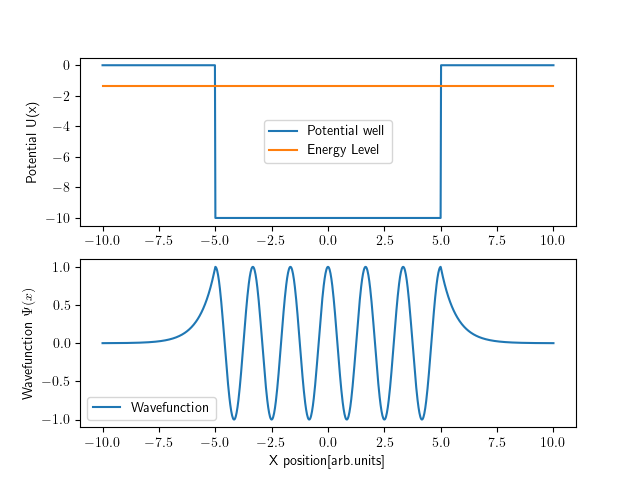

In [2]:
def potentialwell(x, w, Egap):
    return -Egap*np.heaviside(x+w,.5)*np.heaviside(w-x,.5)
def zetafunc(zeta,z0):
    return np.tan(zeta)-np.sqrt((z0/zeta)**2-1)
def etafunc(zeta,z0):
    return 1/np.tan(zeta)+np.sqrt((z0/zeta)**2-1)

def kapa(w,n,m,Egap):
    if(n%2 ==0):
        z0= w*np.sqrt(2*m*Egap)
        zeta = fsolve(etafunc,.1*(n==0)+n*np.pi/2,z0)
        print('eta is pi times',zeta/np.pi )
        kapa = np.sqrt(z0**2-zeta**2)/w
    if(n%2 ==1):
        z0= w*np.sqrt(2*m*Egap)
        zeta = fsolve(zetafunc,n*np.pi/2,z0)
        print('zeta is pi times',zeta/np.pi)
        kapa = np.sqrt(z0**2-zeta**2)/w
    return kapa    
def wellsolution(x,w,Egap,m,kap,n):
    if(n%2 ==0):
        l = np.sqrt(2*m*Egap -kap**2)
        F =np.cos(l*w)/np.exp(-kap*w)
        return np.cos(l*x)*(np.abs(x)<w)+ F*np.exp(-kap*x)*(x>w)+F*np.exp(kap*x)*(x<-w)
    if(n%2 ==1):
        l = np.sqrt(2*m*Egap -kap**2)
        F =np.sin(l*w)/np.exp(-kap*w)
        G =np.sin(-l*w)/np.exp(-kap*w)
        return np.sin(l*x)*(np.abs(x)<w)+ F*np.exp(-kap*x)*(x>w)+G*np.exp(kap*x)*(x<-w)
w =5
m = .82
Egap = 10
n = 12
kap = kapa(w,n,m,Egap)
x = np.linspace(-10,10,1000)
U = potentialwell(x,w,Egap)
psi = wellsolution(x,w,Egap,m,kap,n)
fig,axa=  plt.subplots(2,1)
axa[0].plot(x,U,label = 'Potential well')
energy = -kap**2/2/m
axa[0].plot(x,x*0+energy,label = 'Energy Level')
axa[0].set_ylabel('Potential U(x)')
axa[0].legend()

axa[1].plot(x,psi,label='Wavefunction ')
axa[1].set_ylabel(r'Wavefunction $ \Psi(x)$')
axa[1].set_xlabel('X position[arb.units]')
axa[1].legend()

/tmp/ipykernel_26176/2074961529.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.tan(zeta)-np.sqrt((z0/zeta)**2-1)
/home/admiral/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_26176/2074961529.py:6: RuntimeWarning: divide by zero encountered in divide
  return 1/np.tan(zeta)+np.sqrt((z0/zeta)**2-1)
/tmp/ipykernel_26176/1554492376.py:8: RuntimeWarning: divide by zero encountered in divide
  ax.plot(zeta,np.sqrt((z0/zeta)**2-1))
/tmp/ipykernel_26176/1554492376.py:8: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(zeta,np.sqrt((z0/zeta)**2-1))
/tmp/ipykernel_26176/1554492376.py:10: RuntimeWarning: divide by zero encountered in divide
  ax.scatter(zeta,-1/np.tan(zeta))
/tmp/ipykernel_26176/1554492376.py:12: RuntimeWarning: divide by zero encountered in divid

(0.0, 20.0)

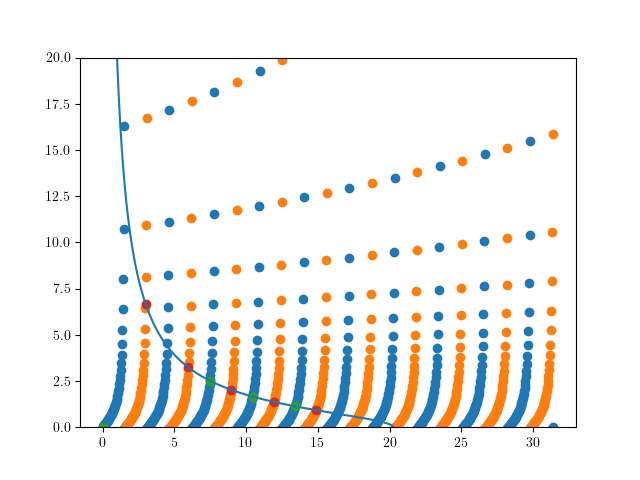

In [3]:

z0= w*np.sqrt(2*m*Egap)
N=10
zetar = [fsolve(zetafunc,n*np.pi/2,z0) for n in range(N)]
etar = [fsolve(etafunc,(n)*np.pi/2,z0) for n in range(N)]

zeta = np.linspace(0,np.pi*N,1000)
fig, ax = plt.subplots()
ax.plot(zeta,np.sqrt((z0/zeta)**2-1))
ax.scatter(zeta, np.tan(zeta))
ax.scatter(zeta,-1/np.tan(zeta))
ax.scatter(zetar,np.tan(zetar))
ax.scatter(etar,-1/np.tan(etar))
ax.set_ylim(0,20)


This simplified model gives us great insights into quantum materials such as quantum wells, 2d semiconductors, quantum dots, and quantum wires, this quantization will begin to effect the energy structure of a material producing some interesting quantum effects as the Volume term and index terms will become more and more discrete. 

Now that we have established some vague idea of the basis of the jellium model in order to discover the source of material properties it uses (such as the band structure, conductivity and effective mass) we must explore the idea of the periodic potentials. 

### *Section 2: Properties of electrons in periodic structures* 
Before diving into the math of calculating band structure lets slow down a little and discuss the mnemonic reasoning for its existence. Hopefully we can recall some discussion of electron scattering in materials, during these discussions we innevitably introduce the concept of diffraction patterns for a particulare material. For example consider a material with a periodic crystalline structure discribed by the lattice vectors $\bf{a_3},\bf{a_3},\bf{a_3}$ and reciprocal lattice vectors 
$$
\bf{b}_1 = 2 \pi \frac{\bf{a}_2 \times \bf{a}_3}{\bf{a}_1 \cdot\bf{a}_2 \times \bf{a}_3},\bf{b}_2 = 2 \pi \frac{\bf{a}_3 \times \bf{a}_1}{\bf{a}_1 \cdot\bf{a}_2 \times \bf{a}_3},\bf{b}_3 = 2 \pi \frac{\bf{a}_1 \times \bf{a}_2}{\bf{a}_1 \cdot\bf{a}_2 \times \bf{a}_3}
$$

An illustrative example is to look at the reciprocal lattice of graphene next to its electron beam scattering diagram the brullion zones and the lattice share shapes but have differing lattice constants(Giovano et al 2014):

![title](StructureOfGraphine.jpg)

These aforementioned diffractions will occur when an incident wave and diffractive wave have a difference in wavenumber equal to an integer multiple combination of the recprocal lattice vectors... Meaning that state will be reflected or scattered more favorably in particular directions that corrisponed to the reciprocal lattice.(Recep Zan 2013) 

![title](ADiffractionGraphene.jpg)


Now let us abstract from this the idea of a state which has a momentum equal to one of the lattice constants, there are a few properties which we can deduce. First when it is scattered by the lattice it would be leaving with a momentum equal to zero meaning that the electron will have a stationary state in that direction. So the derivative of the frequency with respect to wave number should be zero:
$$\frac{ d\omega}{dk} =0$$ 
A stationary mode in any wave equation is a solution which has its nodes (or antinodes for that matter) on the boundarys of its lattice, think of the harmonics of a guitar string: 

![title](Guitarstring.webp)

The string is excited and oscillates but does not move longitudinally this is similar to what is happening in the electron state

The second feature requires us to examine the effects of the lattice itself, and Before exploring the more complex 3d band structure lets explore a more easily calculable model, that of a linear chain of atoms or molecules, such as a polymer an example of which is depicted below: 

![title](AtomicChainA.png)

And see how the band gap falls out. Obviously for a this model the potential should be described by some function satisfying the following periodic boundary condition with $a_1$ being the lattice constant of the chain: 
$$
U(x) = U(x+n*a_1)
$$
An example of this sort of potential is shown below. 


Text(0, 0.5, 'Potential [arb.units.]')

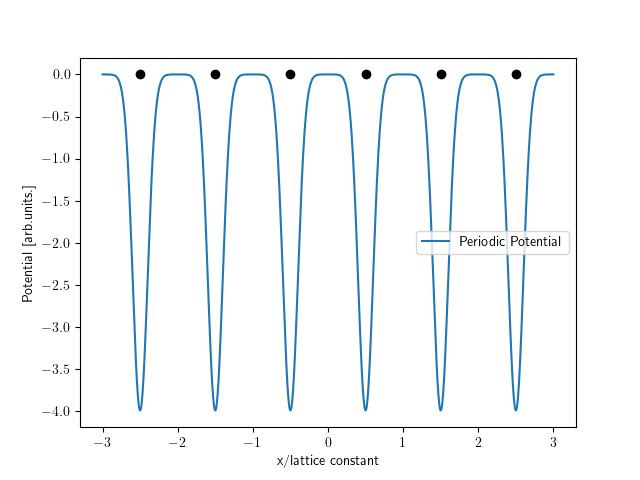

In [4]:
def periodicgauss(x,b,sigma):
    L = np.max(x)-np.min(x)
    N =int( np.ceil(L/b))
    x0 = np.min(x)
    f = 0*x
    ls =[]
    for i in range(N):
        ls.append( -i*b-x0-b/2)
        f += 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x-i*b-x0-b/2)/sigma)**2/2) 
    return -f,np.asarray(ls) 
x= np.linspace(-3,3,1000)
l= 1
b1 = np.pi/l
sigma= .1
U,ls =periodicgauss(x,l,sigma)
psip = np.cos(x*b1)
psim = np.sin(x*b1)
fig,ax = plt.subplots(1,1) 


ax.plot(x,U,label = "Periodic Potential")
ax.legend()
ax.scatter(ls,ls*0,color='k',label='Lattice Site')
ax.set_xlabel('x/lattice constant')
ax.set_ylabel('Potential [arb.units.]')


For a given stationary mode with set wavenumber we could imagine there being be two seperate solutions with the same momentum (k) but differing phases which match the reciprocal lattice vectors. One with nodes on the lattice sites and one with antinodes on the lattice sites. This will obviously give a significant diffence in energy arising from the localization of the electrons near or away from the lattice sites. To make this a little more intuitive lets look at the plots in the cell below this  


Text(0, 0.5, 'Potential [arb.units.]')

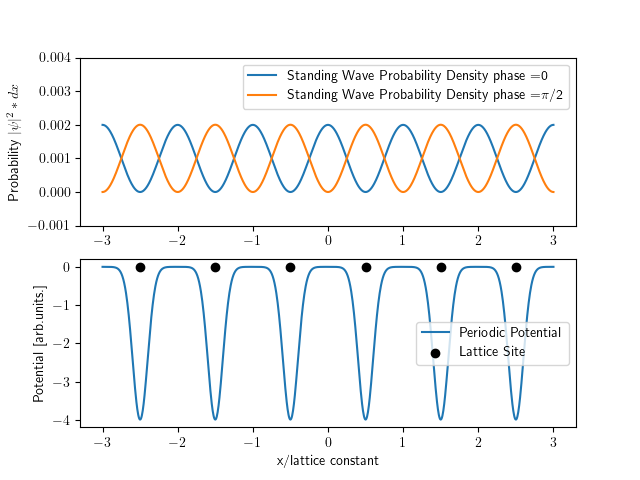

In [42]:


x= np.linspace(-3,3,1000)
l= 1
b1 = np.pi/l
sigma= .1
U,ls =periodicgauss(x,l,sigma)
atomicsites = np.linspace(-3,3,int( np.ceil((np.max(x)-np.min(x))/l)))
psip = np.cos(x*b1)
psim = np.sin(x*b1)
fig,ax = plt.subplots(2,1) 


ax[0].plot(x,psip**2/np.sum(psip**2),label = "Standing Wave Probability Density phase =0")
ax[0].plot(x,psim**2/np.sum(psim**2),label = "Standing Wave Probability Density phase =$\pi$/2")
ax[0].set_ylim(-.001,.004)
ax[0].set_ylabel(r'Probability $|\psi|^2*dx$')
ax[0].legend()

ax[1].plot(x,U,label = "Periodic Potential")
ax[1].scatter(ls,ls*0,color='k',label='Lattice Site')
ax[1].legend()
ax[1].set_xlabel('x/lattice constant')
ax[1].set_ylabel('Potential [arb.units.]')

In [6]:
np.asarray(ls)

array([ 2.5,  1.5,  0.5, -0.5, -1.5, -2.5])

We can see that for the term with a phase of zero (the cos function) the probability is less localized to the lattice sites, and for the term with a phase of $\frac{pi}{2}$ (the sin function)the probability is more localized on the lattice. This means that the energy will be lower for the state with antinodes positioned at the lattices sites. So therefore with a given momentum there is obviously two different energys which may occur for the seperate phases. This results in a discontinuity in the energy structure localized to the boundarys of the brullion zone. 

### *Section 3: 1D periodic potential solutions*


Now that we have a little bit of intuition built for where this band structure comes from lets look into a little bit of the mathematical approach 

Lets start with an arbitrary 1d periodic potential, obviously it should be easy to express something periodic in b1 as a fourier series so given the potential from before we get: 

$$U(x) = \Sigma_{G} *U_G e^{i*G*x}, where, U_G = \int e^{i*G*x}*U_{exp}(x)*dx $$ 

G is all summed over all interger multiples of b1 and U_exp(x) is some explicitly defined arbitrary periodic potential such as the periodic guassian above.

Now we can set about solving the wave equation for this potential: 

$$(\frac{1}{2 m} p^2 +U(x)) \Psi(x) = \epsilon \Psi(x) $$ 

Any bounded region should have a solution for $\Psi$:  

$$\Psi_{\bf{k}}(x) = \Sigma_{\bf{k}} c_{\bf{k}} e^{ikx}$$ 

With k summed over all wavenumbers fitting within the bounding space of the box (ie $k\in \frac{n*\pi}{L}$ ). Now the alarm bells start ringing


![title](SpongeBob.jpg)

We see That all parts of the wave equation can be expressed as fourier transforms, and now we know what must be done, we're moving to frequency space... before we do we must remember something important. The derivative of a fourier transform and the relationship between momentum and position space...
$$\frac{d}{dx} \Sigma_k C_k e^{ikx} =\Sigma_k k C_k e^{ikx} $$ 
$$ p = -i \hbar \frac{d}{dx}$$
From these two facts we can generate the equation: 
$$ 
\frac{\hbar^2}{2 m} \Sigma_k k^2*C_k e^{ikx} +\Sigma_G \Sigma_k U_G C_k e^{i*(k+G)*x} = \epsilon*\Sigma_k C_k e^{ikx}  
$$
Now we must make the fourier components over k equivalent to have distinct wave numbers and this gives us the relationship: 
$$
(\frac{\hbar^2 k^2}{2 m}-\epsilon) C_k +\Sigma_G U_G C_{k-G} = 0
$$ 

### *Section 3: An explicit solution*

Now lets try this on a directly solvable scenario namely the Kronig-Penney Model for a periodic dirac function defined as follows:

$$
U_{exp} (x) = Aa*\Sigma_sa \delta(x-s*a); s \in int 
$$
with a being the period of the potential, taking this into fourier space for an even potential: 
$$
U(x) = \Sigma_G 2*A Cos(G*x) 
$$


0

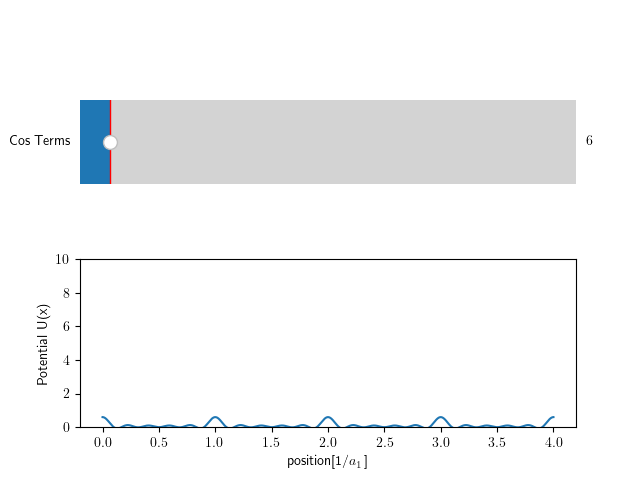

In [43]:
x = np.linspace(0,4,2000)
y = []
A = .1
a = 1 
for n in range(100):
    y.append(A*np.cos(n*2*np.pi*x/a))
plt.clf()
y = np.asarray(y).transpose()
fig,ax = plt.subplots(2,1)
result, = ax[1].plot(x,np.sum(y[:,0:6],axis=1))
ax[1].set_ylabel("Potential U(x)")
ax[1].set_xlabel(r"position[1/$a_1$]")
ax[1].set_ylim(0,10)
index_slider = Slider(
    ax=ax[0],
    label='Cos Terms',
    valmin=0,
    valmax=100,
    valinit=6,
    valstep=1
)
def update(val):
    index = index_slider.val
    result.set_ydata(np.sum(y[:,0:index],axis=1))
    fig.canvas.draw_idle()

index_slider.on_changed(update)

(An odd potential would just have a sin function instead) giving us the following form for the frequency space shrodinger equation: 
$$
(\frac{\hbar^2 k^2}{2 m}-\epsilon) C_k +A\Sigma_G C_{k-G} = 0
$$ 
From here lets substitute in a function of k for the sum over G, and define some constants to make typing this a little less of a living hell 
$$
f(k) \equiv  A\Sigma_G C_{k-G} 
$$
$$
\alpha \equiv \frac{\hbar^2}{2 m}
$$
now we reconstruct the shrodinger equation with those replacements to construct a relationship for the new function: 
$$
C(k) = \frac{A*f(k)}{\alpha*k^2-\epsilon}  
$$
And we remind ourselves that the sum for f(k) is infinite so...
$$
f(k-G) = f(k)
$$
from the shrodinger equation generated relationship for the function f we can construct the relation
$$
C(k-G)= \frac{A f(k)}{\alpha(k-G)^2-\epsilon}
$$
Now taking the sum over G for both sides then massaging the algebra a little:
$$
\Sigma_G C(k-G)= \Sigma_G \frac{A f(k)}{\alpha(k-G)^2-\epsilon} =
$$
$$ 
f(k-G) = \Sigma_G \frac{A f(k)}{\alpha(k-G)^2-\epsilon}
$$
$$
1/A = \Sigma_G \frac{1}{\alpha(k-G)^2-\epsilon}
$$
$$
1/A = \Sigma_G -\frac{1}{\sqrt{\epsilon}}(\frac{1}{-\alpha*(k-G) +\sqrt{\epsilon}} +\frac{1}{+\alpha*(k-G)+\sqrt{\epsilon}} )   
$$
Now we use the definition of G in conjunction with the series definitiuon of cotangent:
$$
Cot(a) = \Sigma_n \frac{1}{n*pi+x} 
$$
$$
\frac{\alpha}{A} = -\Sigma_n \frac{1}{\sqrt{\epsilon}}(\frac{1}{(k-2*\pi*n/a) +\alpha*\sqrt{\epsilon}} +\frac{1}{(k-2*\pi*n/a)-\alpha*\sqrt{\epsilon}} )   
$$
now x will be $ a/2*(k-\alpha *\sqrt{\epsilon}) $ for the definition of cotangent
$$
\frac{\alpha}{A}= -\Sigma_n \frac{a}{2\sqrt{\epsilon}} (\frac{1}{(k-2*\pi*n/a) +\alpha*\sqrt{\epsilon}} +\frac{1}{(k-2*\pi*n/a)-\alpha*\sqrt{\epsilon}}
$$
$$
\frac{\alpha}{A}=- \frac{a}{2\sqrt{\epsilon}} (cot(k*a/2-\alpha*\sqrt{\epsilon}/2) - cot(k*a/2+\alpha*\sqrt{\epsilon}/2))
$$
Which after quite a bit of massaging will become 
$$
\frac{\alpha*2*\sqrt{\epsilon}}{A*a} = cot(k*a/2-\alpha*\sqrt{\epsilon}/2) - cot(k*a/2+\alpha*\sqrt{\epsilon}/2)) 

$$
$$
\frac{\alpha*2*\sqrt{\epsilon}}{A*a} = \frac{cos(k*a/2-\alpha*\sqrt{\epsilon}/2)}{sin(k*a/2-\alpha*\sqrt{\epsilon}/2)} - \frac{cos(k*a/2+\alpha*\sqrt{\epsilon}/2)}{sin(k*a/2+\alpha*\sqrt{\epsilon}/2)} 

$$
$$
\frac{\alpha*2*\sqrt{\epsilon}}{A*a} = \frac{cos(k*a-\alpha*\sqrt{\epsilon})sin(k*a+\alpha*\sqrt{\epsilon})-cos(k*a+\alpha*\sqrt{\epsilon})sin(k*a-\alpha*\sqrt{\epsilon})}{sin(k*a+\alpha*\sqrt{\epsilon})*sin(k*a-\alpha*\sqrt{\epsilon})} 
$$
$$
\frac{\alpha*2*\sqrt{\epsilon}}{A*a} = \frac{sin(k*a)+sin(\alpha*\sqrt{\epsilon})-sin(k*a)+sin(\alpha*\sqrt{\epsilon})}{cos(k*a)-cos(\alpha*\sqrt{\epsilon})} 
$$
$$
\frac{a*A}{\sqrt{\epsilon}} *sin(\alpha*\sqrt{\epsilon}*a)+cos(\alpha*\sqrt{\epsilon}*a) = cos(k*a)  
$$
This is not exactly a nice equation but it produces the desired result, namely a band structure with forbidden and allowed bands lets look into what exactly this means for this particular equation

In [10]:

def KPband(K,P):
    return P/(K)*np.sin(K)+np.cos(K)

We have simplified the equation to remove annoying constants but the basic meaning is the same the large K stands in for the constant of energy multiplied by the lattice constant, P stands in for the term at the start of the equation.  

/tmp/ipykernel_26176/3870454960.py:2: RuntimeWarning: divide by zero encountered in divide
  return P/(K)*np.sin(K)+np.cos(K)
/tmp/ipykernel_26176/3870454960.py:2: RuntimeWarning: invalid value encountered in multiply
  return P/(K)*np.sin(K)+np.cos(K)
/tmp/ipykernel_26176/1519840204.py:10: RuntimeWarning: invalid value encountered in arccos
  ax[1].scatter(np.arccos(KPband(K,4))/np.pi,K,color='b')
/tmp/ipykernel_26176/1519840204.py:11: RuntimeWarning: invalid value encountered in arccos
  ax[1].scatter(-np.arccos(KPband(K,4))/np.pi,K,color='b')


Text(0, 0.5, 'Energy[arb.units]')

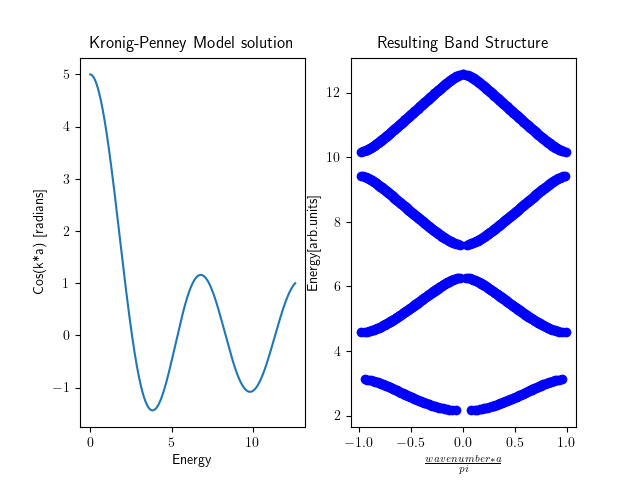

In [12]:
fig,ax = plt.subplots(1,2)
K = np.linspace(0,np.pi*4,1000)

ax[0].plot(K,KPband(K,4))
ax[0].set_title('Kronig-Penney Model solution')
ax[0].set_xlabel('Energy')
ax[0].set_ylabel('Cos(k*a) [radians]')

ax[1].set_title('Resulting Band Structure')
ax[1].scatter(np.arccos(KPband(K,4))/np.pi,K,color='b')
ax[1].scatter(-np.arccos(KPband(K,4))/np.pi,K,color='b')
ax[1].set_xlabel(r"$\frac{wavenumber*a}{pi}$")
ax[1].set_ylabel('Energy[arb.units]')


The plot on the right just being the inverse cos of the y values plotted as x values on the left. A few interesting things occur in making this transition, the first of which is the production of band gaps, with the 
the inverse cos only being defined for values between +/-1 the next is the inversion at the brullion zone boundaries

Looking a little closer at it let's pretend we have a semiconductor with a fermi energy say at 7 evs

### *Section 3: An explicit numerical solution*
This approach is excellent for a first blush understanding 

In [6]:
def kspace(N,c,dx):
    k = []
    for i in range(N-1):
        if(np.floor(i/(c*dx*N))%2==0):
            k.append(np.pi*(i/(c*dx*N)-np.floor(i/(c*dx*N))))
        else:
            k.append(np.pi*(np.ceil(i/(c*dx*N))-(i/(c*dx*N))))
    return np.asarray(k)

0

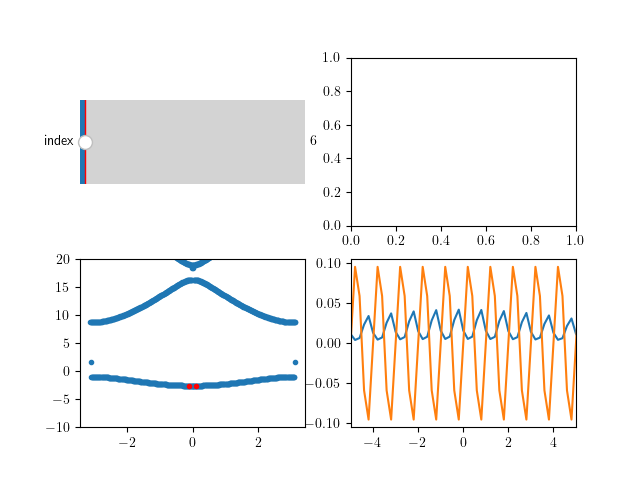

In [21]:

#Section 1
m = 1 ;hb = 1; w = 1 # define physical constants 

#section 2 
N = 1000#  Number of steps


c = 1 # width of potential well 
L = 100*c #width of simulation window
a = -L; b =L #bounds of window
x = np.linspace(a,b,N+1) # generate x space 
dx = x[1]-x[0] #define differential step 

#Section 3 
E0 = hb/(dx**2)*(-2*np.eye(N-1)+np.diag(np.ones(N-2),1)+np.diag(np.ones(N-2),-1))#define differential matrix  


v0 = (1/2/m*w*x) 
v = np.diag(v0[1:-1])
v1 = 10*np.sin(2*np.pi/c*x)#20*(1+sig.square(2*np.pi/c*x,duty=.5,))#*np.heaviside(x,0)*np.heaviside(c*7-x,0)#50*np.sin(2*np.pi/c*x)
V = np.diag(v1[1:-1])
H1 = -E0/2/m*hb 
H = -E0/2/m*hb+V

#section 4
D1,fx1 = np.linalg.eig(H1)
D,fx2 = np.linalg.eig(H)
n = np.arange(1,N)
E00 =(np.pi/L*n)**2 
idx = D.argsort()[-N::]
D  =  D[idx]
fx2 = fx2[:,idx]
k = kspace(N,c,dx)
k = np.append(k,-kspace(N,c,dx))
D = np.append(D,D)
#section 5
fig,ax= plt.subplots(2,2)
ax[1,0].plot(k,D,'.')
indicator, = ax[1,0].plot([k[6],k[6+N]],[D[6],D[6+N]],'.',color='r') 
ax[1,0].set_ylim(-10,20)
eigplot, = ax[1,1].plot(x[1:-1],10*(fx2[:,6])**2) 
ax[1,1].plot(x[1:-1],v1[1:-1]*.01)
ax[1,1].set_xlim(-5*c,5*c)
# Make a horizontal slider to control the frequency.
index_slider = Slider(
    ax=ax[0,0],
    label='index',
    valmin=0,
    valmax=300,
    valinit=6,
    valstep=1
)
def update(val):
    index = index_slider.val
    eigplot.set_ydata(10*(fx2[:,index])**2)
    indicator.set_ydata([D[index]])
    indicator.set_xdata([k[index]])
    fig.canvas.draw_idle()

index_slider.on_changed(update)

## First section: 
Define constants to be 1 (electron mass hbar etc) 

## Second section: 
Generate the x space for the potential 

## Third section : Define the following matrices
 
### 1st the second order differential matrix for the kinetic energy term   
$$ E_0 = hb/dx^2*(-2*np.eye(N-1))+np.diag(np.ones(N-2),1)+np.diag(np.ones(N-2),-1)$$
$$ =\frac{\hbar}{dx^2 }  
        \begin{pmatrix}
        2 & 1 & 0 & ...\\
        1 & 2 & 1 & ...\\
        0 & 1 & 2 & ...\\ 
        ... & ... & ... & ...\\ 
        
        \end{pmatrix}
$$ 
Is the 100x100 finite difference matrix expression of a differentail element


### 2nd we create the potential equation 
$$ v1 = 10*np.cos(2*np.pi/c*x) = 10*Cos(\frac{2*\pi}{c}*x) $$
$$ V = np.diag(v1[2:-1]) = $$ 
$$ \begin{pmatrix}
        v1(x_1) & 0      & 0        & ...\\
        0       &v1(x_2) & 0        & ...\\
        0       & 0      & v1(x_3)  & ...\\ 
        ...     & ...    & ...      & ...\\ 
        
        \end{pmatrix}
$$ 
### 3rd we finally define the hamiltonain 
$$ H =  -E0/2/m*\hbar+V $$ 
Which is equivalent to: 
$$H = -\frac{\hbar^2}{2m}\frac{d}{dx} + V $$

### 4th solve for the eigen vectors of the hamiltonian 

The eig method takes a given matrix and finds its eigen vectors and values so the following:  
 
$$ D,fx2 = np.linalg.eig(H)$$

Will take the following equation to find the equation eigen solutions or solutions for which E is a constant 
       $$ H\cdot \vec{f}_2(\vec{x}) = E*\vec{f}_2(\vec{x}) $$ 
This solution takes place in what is effectively wave number space so the X space of the energy will now be given in increments in the frequency domain 
we also note from the bloch equations that the equations will be periodic in wave number so they should wrap backwards with the period of the array 

In [40]:
for i in range(20):
    print(np.)

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
